# Decision Tree를 이용한 와인데이터 분석 - Wine

In [2]:
import pandas as pd

In [3]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# 두 데이터 합치기 전에 두 데이터 구분 지어주기
# color라는 컬럼 만들어서 1이면 red_wine
red_wine['color'] = 1.
white_wine['color'] = 0.

# concat으로 합치기(sql이랑 문법 비슷)
wine = pd.concat([red_wine, white_wine])
wine.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [8]:
# quality 컬럼을 unipue로 조사
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [9]:
import plotly_express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [10]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [11]:
fig = px.histogram(wine, x='quality', color='color')
fig.show()

# 1. 레드와인, 화이트 와인 분류

In [12]:
x = wine.drop(['color'], axis=1)
y = wine['color']

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [14]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3913, 1284]))

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

# 훈련 데이터셋의 품질에 대한 히스토그램을 추가
fig.add_trace(go.Histogram(x=x_train['quality'], name='Train'))
# 테스트 데이터셋의 품질에 대한 히스토그램을 추가
fig.add_trace(go.Histogram(x=x_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')  # 히스토그램을 겹쳐서 표시
fig.update_traces(opacity=0.7) # 투명도 조정 : opacity
fig.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
# 학습시킴
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [17]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

In [18]:
# 학습 결과
accuracy_score(y_train, y_pred_tr)

0.9553588608812776

In [19]:
# 학습 결과
accuracy_score(y_test, y_pred_test)

0.9569230769230769

In [20]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# 2. 데이터 전처리

In [24]:
fig = go.Figure()
fig.add_trace(go.Box(y=x['fixed acidity'], name= 'fixed acidity'))
fig.add_trace(go.Box(y=x['chlorides'], name= 'chlorides'))
fig.add_trace(go.Box(y=x['quality'], name= 'quality'))
fig.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 각각 변수 할당
mms = MinMaxScaler()
ss = StandardScaler()

# fit(학습 시킴)
mms.fit(x)
ss.fit(x)

X_ss = ss.transform(x)
X_mss = mms.transform(x)

In [26]:
X_ss_pd = pd.DataFrame(X_ss, columns=x.columns)
X_mss_pd = pd.DataFrame(X_mss, columns=x.columns)

In [27]:
# MinMaxScaler을 사용해서 최대 최소값을 1과 0으로 강제로 맞춤
fig = go.Figure()
fig.add_trace(go.Box(y=X_mss_pd['fixed acidity'], name= 'fixed acidity'))
fig.add_trace(go.Box(y=X_mss_pd['chlorides'], name= 'chlorides'))
fig.add_trace(go.Box(y=X_mss_pd['quality'], name= 'quality'))
fig.show()

### StandardScaler 평균을 0으로 표준편차를 1로 맞추는 것
- 표준편차 = 데이터가 평균(평균적인 값)에서 얼마나 퍼져 있는지를 나타내는 수치

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_mss_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


# 레드와인과 화이트와인 구분

In [29]:
# 컬럼 이름은 x_train 동일하게 분류기는 fit시킨  wine_tree
dict(zip(x_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.2423036054966077,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033923,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

# 2. 와인 맛에 대한 분류 - 이진 분류

In [32]:
# wine DataFrame에서 quality 컬림이 5보다 클 경우 'taste 컬럼을 생성 후 1로 지정 아닐경우 0 지정
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [33]:
x = wine.drop(['taste'], axis=1)
y = wine['taste']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [34]:
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  1.0
Test Acc :  1.0


### 위 실행값을 보고 학습시킨 모델 정확도가 1.0 이 나오면 무조건 의심

[Text(0.5, 0.75, 'quality <= 5.5\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1907\nvalue = [1907, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3290\nvalue = [0, 3290]')]

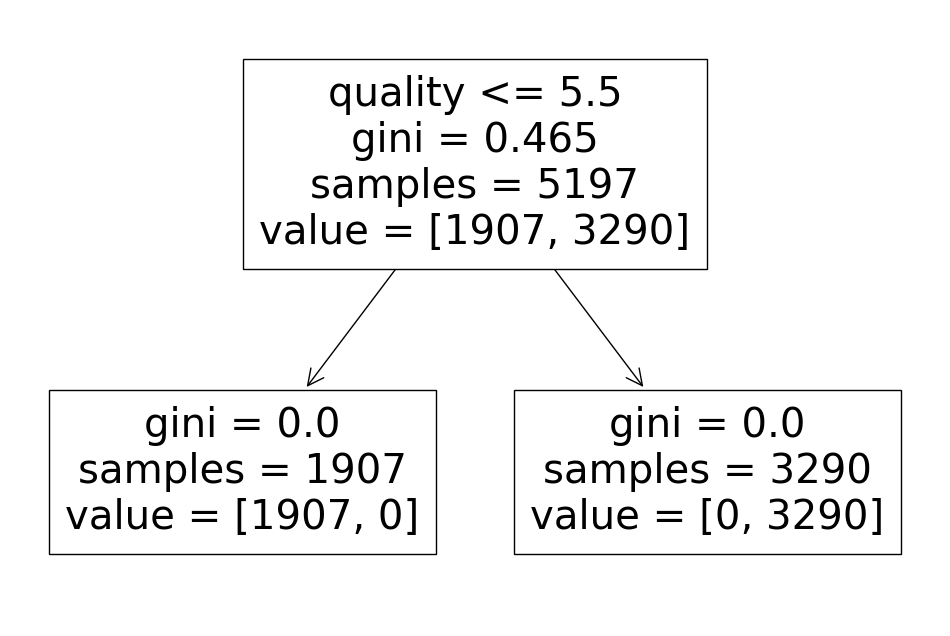

In [35]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12, 8))
tree.plot_tree(wine_tree, feature_names=x.columns)

In [36]:
x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [37]:
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


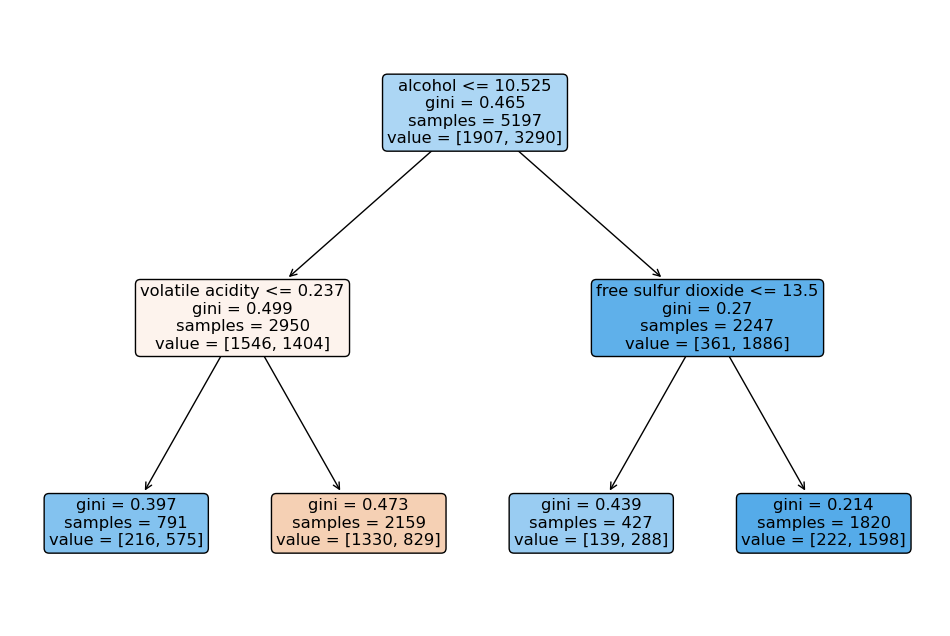

In [38]:
plt.figure(figsize=(12, 8))
tree.plot_tree(wine_tree, feature_names=x.columns,
               rounded=True,
               filled=True)
plt.show()